# Importing Libraies

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

 # Loading Dataset

In [4]:
data_set=pd.read_csv('log2.csv')
data_set

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


# Analyzing Data

In [5]:
data_set.shape

(65532, 12)

In [9]:
data_set.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [10]:
data_set.dtypes

Source Port              int64
Destination Port         int64
NAT Source Port          int64
NAT Destination Port     int64
Action                  object
Bytes                    int64
Bytes Sent               int64
Bytes Received           int64
Packets                  int64
Elapsed Time (sec)       int64
pkts_sent                int64
pkts_received            int64
dtype: object

In [13]:
data_set['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

# Splitting Dataset And Feature Scaling

In [14]:
x=data_set.drop('Action',axis=1)
x

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,177,94,83,2,30,1,1
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,192,122,6,15,4,2
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,70,70,0,1,0,1,0
65530,54870,445,0,0,70,70,0,1,0,1,0


In [20]:
y=pd.DataFrame(data_set['Action'])
y

,Action
0,allow
1,allow
2,allow
3,allow
4,allow
...,...
65527,allow
65528,allow
65529,drop
65530,drop


In [21]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state=101) 

In [23]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

# Building Model

In [26]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=101)  
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=101, splitter='best')

In [27]:
y_pred= classifier.predict(x_test)

# Accuracy

In [61]:
score = accuracy_score(y_test,y_pred)
score*100

78.73346897253306

In [29]:
matrix= confusion_matrix(y_test, y_pred) 
matrix

array([[11100,   135,     0,   102],
       [    3,  4379,     0,     4],
       [    0,  3925,     0,     0],
       [    0,    12,     0,     0]], dtype=int64)

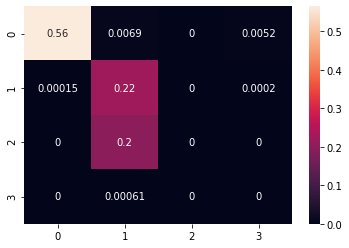

In [71]:
sns.heatmap(matrix/np.sum(matrix),annot=True)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       allow       1.00      0.98      0.99     11337
        deny       0.52      1.00      0.68      4386
        drop       0.00      0.00      0.00      3925
  reset-both       0.00      0.00      0.00        12

    accuracy                           0.79     19660
   macro avg       0.38      0.49      0.42     19660
weighted avg       0.69      0.79      0.72     19660

